In [1]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Import for features(x)
import glob
from PIL import Image
from numpy import asarray
import numpy as np

#Import for labels(y)
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the necessary datasets for model

In [3]:

#np.save("x.npy",x)
#np.save("y.npy",y)
x_train=np.load("/content/drive/MyDrive/datasets/x_train.npy")
y_train=np.load("/content/drive/MyDrive/datasets/y_train.npy")
x_val=np.load("/content/drive/MyDrive/datasets/x_val.npy")
y_val=np.load("/content/drive/MyDrive/datasets/y_val.npy")
x_test=np.load("/content/drive/MyDrive/datasets/x_test.npy")
y_test=np.load("/content/drive/MyDrive/datasets/y_test.npy")
#x=np.load("x.npy")
#y=np.load("y.npy")

## Constructing the neural network

That was it for the preprocessing of the data! 

Now we can create our model. First, we start by creating a model object using the Sequential API of Keras.

📌 Use tf.keras.Sequential() to create a model object

In [12]:
# Create a model object
model=tf.keras.Sequential()

### Feature extraction layers

For the first two layers, we add a convolution and max pooling layer.

📌 Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

📌 Use .add() method of the object to add the layer.

In [13]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(100,100,4)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

Then, we add more layers. One convolution, one max pooling, and one convolution layer again.

📌 Use tf.keras.layers.Conv2D() and tf.keras.layers.MaxPooling2D() to create the layers.

📌 Use .add() method of the object to add the layer.

In [14]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"
                                 ))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"
                                 ))

### Flatten

To connect the 2D convolution and 1D dense layers, we have to "flatten" the convolution layer.

📌 Use tf.keras.layers.Flatten() to flatten the layers.

📌 Use .add() method of the object to add the layer.

In [15]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

### Classification layers

Now that we have the features extracted, we can move on to the classification part. We add two dense layers each with 64 nodes, 0.5 dropout and ReLU activation functions.

📌 Use tf.keras.layers.Dense() to create the layers.

📌 Use .add() method of the object to add the layer.

In [16]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

### Output layer

As the last part of our neural network, we add the output layer. The number of nodes will be equal to the number of target classes which is 10 in our case. We'll use the softmax activation function in the output layer.

📌 Use tf.keras.layers.Dense() to create the layer.

📌 Use .add() method of the object to add the layer.

In [17]:
# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))

### Optimizer

Now we have the structure of our model. To configure the model for training, we'll use the .compile() method. Inside the compile method, we have to define the following:
*   "Adam" for optimizer
*   "Sparse Categorical Crossentropy" for the loss function


📌 Construct the model with the .compile() method.

In [19]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Training the model

It's time to train the model. We'll give the X_train and y_train datasets as the first two arguments. These will be used for training. And with the *validation_data* parameter, we'll give the X_val and y_val as a tuple.

📌 Use .fit() method of the model object for the training.

In [20]:
# Train the model for 50 epochs with batch size of 128
results=model.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
55/55 [==============================] - 16s 64ms/step - loss: 2.3093 - accuracy: 0.1190 - val_loss: 2.2883 - val_accuracy: 0.1180
Epoch 2/50
55/55 [==============================] - 3s 48ms/step - loss: 2.2789 - accuracy: 0.1081 - val_loss: 2.2691 - val_accuracy: 0.1100
Epoch 3/50
55/55 [==============================] - 3s 48ms/step - loss: 2.2682 - accuracy: 0.1174 - val_loss: 2.2614 - val_accuracy: 0.1501
Epoch 4/50
55/55 [==============================] - 3s 48ms/step - loss: 2.2612 - accuracy: 0.1250 - val_loss: 2.2534 - val_accuracy: 0.1226
Epoch 5/50
55/55 [==============================] - 3s 48ms/step - loss: 2.2563 - accuracy: 0.1195 - val_loss: 2.2424 - val_accuracy: 0.1203
Epoch 6/50
55/55 [==============================] - 3s 48ms/step - loss: 2.2512 - accuracy: 0.1293 - val_loss: 2.2457 - val_accuracy: 0.1283
Epoch 7/50
55/55 [==============================] - 3s 48ms/step - loss: 2.2458 - accuracy: 0.1304 - val_loss: 2.2380 - val_accuracy: 0.1501
Epoch 8/50
5

### Visualize the results

After the model is trained, we can create a graph to visualize the change of loss over time. Results are held in:
* results.history["loss"]
* results.history["val_loss"]

📌 Use plt.show() to display the graph.

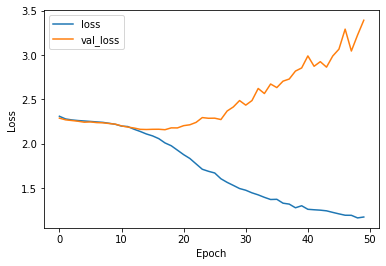

In [21]:
# Plot the the training loss
plt.plot(results.history["loss"],Label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"],Label="val_loss")

# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")
# Put legend table
plt.legend()

# Show the plot
plt.show()

Now do the same thing for accuracy.

📌 Accuracy scores can be found in:
* results.history["accuracy"]
* results.history["val_accuracy"]



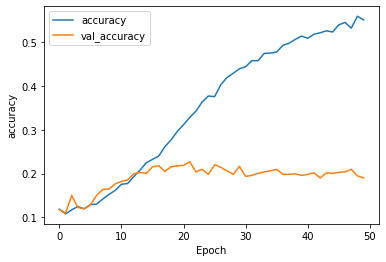

In [22]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"],Label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"],Label="val_accuracy")

# Name the x and y axises
plt.ylabel("accuracy")
plt.xlabel("Epoch")

# Put legend table
plt.legend()

# Show the plot
plt.show()



## Performance evaluation

Let's use the test dataset we created to evaluate the performance of the model.

📌 Use test_on_batch() method with test dataset as parameter

In [23]:
# Evaluate the performance
model.evaluate(x_test,y_test)

28/28 [==============================] - 0s 11ms/step - loss: 3.5590 - accuracy: 0.1648


[3.559014320373535, 0.16475972533226013]

### Try a prediction

Next, we take the sample we selected at the beginning and make a prediction on it.

📌 Reshape the image to (1,32,32,3)

📌 Use the *.prediction()* method of the model object

In [25]:
location=250
# Make prediction on the reshaped sample
prediction_result=model.predict(x_test[location].reshape(1,100,100,4))

# Print the prediction result
prediction_result

array([[0.16309147, 0.00440608, 0.01856925, 0.02617857, 0.00899453,
        0.04859787, 0.00101346, 0.22737777, 0.02904021, 0.47273085]],
      dtype=float32)

Finally, we find the predicted class and prediction probability and print the results.

📌 Use .argmax() to find the class.

📌 Use .max() to find the probability.

In [26]:
# Find the predicted class
predicted_class=prediction_result.argmax()
# Find the prediction probability
predicted_probability=prediction_result.max()

In [27]:
# Print the results
print(f"this image belongs to class {predicted_class} with {predicted_probability} probability")

this image belongs to class 9 with 0.4727308452129364 probability


In [28]:
print(f"this image was actually belongs to class {y_test[location]}.")

this image was actually belongs to class 7.
